# Sentiment Analysis

Mini project proposed by the Data Science Academy, regarding Sentiment Analysis on Twitter using R language.

### Project Summary

* [1. Fundaments](#1.-Fundaments)
	* 1.1 Problem definition and comprehension of context
	* 1.2 Identification of entities and its features
	* 1.3 Collect data that represents entities
* [2. Data Mining/Wrangling](#2.-Data-Mining/Wrangling)
	* 2.1 Understand & Tidy the dataset
	* 2.2 Understand & Analyse: hypothesis generation
	* 2.3 Understand & Transform
	* 2.4 Data Exploration: hypothesis confirmation
	* 2.5 Iteration
* [3. Data StoryTelling](#3.-Data-StoryTelling)
	* [3.1 Choose appropriate visual](#3.1-Choose-appropriate-visual)
	* [3.2 Decluter it](#3.2-Decluter-it)
	* [3.3 Focus attention](#3.3-Focus-attention)
	* [3.4 Think like a designer](#3.4-Think-like-a-designer)
	* [3.5 Tell the story of data](#3.5-Tell-the-story-of-data)

----

## 1. Fundaments


### 1.1 Problem definition and comprehension of context

Problem: Which sentiment prevails the most on the recent comments related to the 
President Trump? Is it positive or is it negative?

Context: The acts of President Trump are polemic to some and applauded by others.
Let's see which sentiments prevail the most on the 2000 recent comments on twitter.


### 1.2 Identification of entities and its features

Entities: comments on twitter that has "President Trump" in its content



### 1.3 Collect data that represents entities

In [1]:
# loading packages (and installing them before, if not installed)
if(!require(tidyverse)) { install.packages("tidyverse"); library(tidyverse) }
if(!require(twitteR)) { install.packages("twitteR"); library(twitteR) }
if(!require(tidytext)) { install.packages("tidytext"); library(tidytext) }
if(!require(gridExtra)) { install.packages("gridExtra"); library(gridExtra) }
if(!require(stopwords)) { install.packages("stopwords"); library(stopwords) }


# Setting up Twitter authentication
# You need to have a twitter account. If you do not have one go to http://twitter.com/signup and 
# set one up. Also you need to have a mobile number as part of this account.
# 
# Now that you have created a twitter account you need to go to https://apps.twitter.com and sign up
# to a development account with your twitter account. You'll have to answer some questions regarding
# the use you will make with that account.
# 
# Once you get your Twitter development account, go back to https://apps.twitter.com and click on the 
# “Create New App” button. When on the Create an App screen, there are some required fields to fill:
# "App name", "Application description", "Website URL" and "Tell us how this app will be used".
#
# The name of the application must be unique so this may take a few tries. The description needs to be 
# at least 10 character long and at most 200 characteres long. The website field is any that people can
# reach you, like a Github or a personal webpage.The last required field, "Tell us how this app will be 
# used" needs to be at least 100 characters long. 
#
# After the creation, click on the "Keys and tokens" tab, then on the button "Create" under the 
# "Access token & access token secret" section. Those keys and tokens are secret, don't show them to anyone.
# You will need them to the next step, to make your analysis.

# Creating objetcs with your API key and access token:
consumer_key <- "" # consumer_api_key
consumer_secret <- "" # consumer_api_secret_key
access_token <- "" # access_token
access_secret <- "" # access_token_secret

# Setting up the authentication for a twitteR session. Use option 1 or 2 when asked.
# For more information, see the help of the following function.
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

# Searching for the entities previously stablished on the summary of this project 
# For more informations, see the help of the following function.
twitters_search <- searchTwitter("President Trump", n = 2000, lang = "en")

# Converting objects to data frames, then removing objects that won't be needed
# For more information, see the help of these functions.
twitters_search_df <- twListToDF(twitters_search)
twitters_search_df <- as_tibble(twitters_search_df)

# Just in case you need this data frame latter. 
# See dput() documentation for more information.
# dput(twitters_search_df, file = "twitters_search_df.R") 

# Before loading the script generated by the dput function, you must create an object 
# with its content, adding the following code at the beginning of the script: "twitters_search_df = "
# I highly recommend executing this script with the "Source" option, that in RStudio has
# the shortcut "CTRL + SHIFT + S". Or you can use the following command: source("twitters_search_df.R")
# Otherwise, the execution/loading will be very slow (as it has about seven thousand lines).


Loading required package: tidyverse
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'dplyr' was built under R version 3.6.1"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: twitteR

Attaching package: 'twitteR'

The following objects are masked from 'package:dplyr':

    id, location

Loading required package: tidytext
Loading required package: gridExtra

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: stopwords
Warning message:
"package 'stopwords' was built under R version 3.6.1"

[1] "Using direct authentication"


---

# 2. Data Mining/Wrangling

* 2.1 Understand & Tidy the dataset
* 2.2 Understand & Analyse: hypothesis generation
* 2.3 Understand & Transform
* 2.4 Data Exploration: hypothesis confirmation
* 2.5 Iteration

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
"argument is not an atomic vector; coercing"

[1] FALSE

Selecting by n


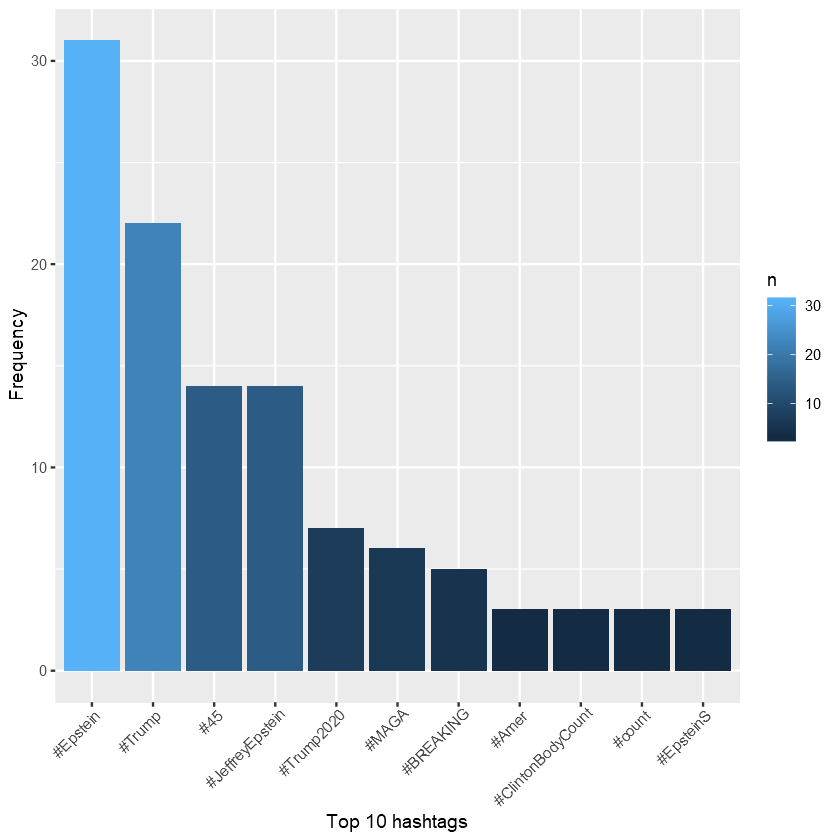

In [7]:
# Making sure you have a data frame as a tibble
# For more information, see the help of this function.
twitters_search_df <- as_tibble(twitters_search_df)

# Adding NA to the cells that don't have any hashtags
# For more information, see the help of these functions.
hashtag_tweets <- apply(twitters_search_df[,1], 
                        MARGIN = 2, 
                        FUN = function(x) {
                              ifelse(
                                # test (if it detects a hashtag):
                                stringr::str_detect(x, "#\\w+")==T,
                                # if true, then a vector containing the matching elements themselves 
                                # (all values in each cell) is returned:
                                grep(pattern = "#\\w+", x = x, value = TRUE), 
                                # if false, then return NA:
                                NA ) 
                              } )


# Extracting hashtags 
# For more information, see the help of these functions.
hashtag_tweets <- hashtag_tweets %>% 
  as_tibble() %>% 
  str_extract_all("#\\w+", simplify = T) %>% 
  t() %>% 
  as_tibble()

# Is there any NA?
any(is.na(hashtag_tweets))

# Barplot of hashtags
# For more information, see the help of these functions.
hashtag_tweets %>% 
  count(V1, sort = T) %>% 
  top_n(10) %>% 
  ggplot(aes(x = reorder(V1, n, function(n) -n), y = n, fill = n)) +
  geom_bar(stat="identity") +
  theme(axis.text.x = element_text(angle = 45, 
                                   hjust = 1)) +
  xlab("Top 10 hashtags") +
  ylab("Frequency")


#### Wrangling on tweets for exploratory analysis #####

# Cleaning tweets
# For more information, see the help of these functions.
clean_tweets <- twitters_search_df %>% 
  select(text) %>% 
  apply(MARGIN = 2, 
        FUN =  function(x) {
          x = gsub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ", x)
          x = gsub("http\\w+", "", x)
          x = gsub("(RT|via)((?:\\b\\W*@\\w+)+)", " ", x)
          x = gsub("#\\w+", " ", x)
          x = gsub("@\\w+", " ", x)
          x = str_replace_all(x, "(\\<.*?\\>)", "")
          x = str_replace_all(x, "[[:punct:]]", " ")
          x = gsub("[[:digit:]]", " ", x)
          x = stringi::stri_trans_tolower(x)
        }) %>%  
  as_tibble()


# Looking for NA's (works fine in a data.frame or tibble object)
# sapply(clean_tweets, function(x) { sum(is.na(x))})

# Putting each word into a row with unnest_tokens of {tidytext}
# For more information, see the help of these functions.
tweet_words <- clean_tweets %>%
                  tidytext::unnest_tokens(word, text)

# creating a list of stopwords
# For more information, see the help of these functions.
list_stopwords_iso <- stopwords::stopwords(language = "en", 
                                           source = "stopwords-iso") %>% 
                                    enframe(name = NULL) %>% 
                                    add_row(value = c("trump", "president"))

# This is an alternative list:
# list_snowball <- stopwords::stopwords(language = "en", source = "snowball") %>% 
#                     enframe(name = NULL)


# Removing stopwords of the data frame
# For more information, see the help of these functions.
clean_tweet_words <- tweet_words %>% 
                        anti_join(list_stopwords_iso, 
                                  by = c("word" = "value"))



---

# 3. Data StoryTelling

* 3.1 Choose appropriate visual
* 3.2 Decluter it
* 3.3 Focus attention
* 3.4 Think like a designer
* 3.5 Tell the story of data


Joining, by = "word"


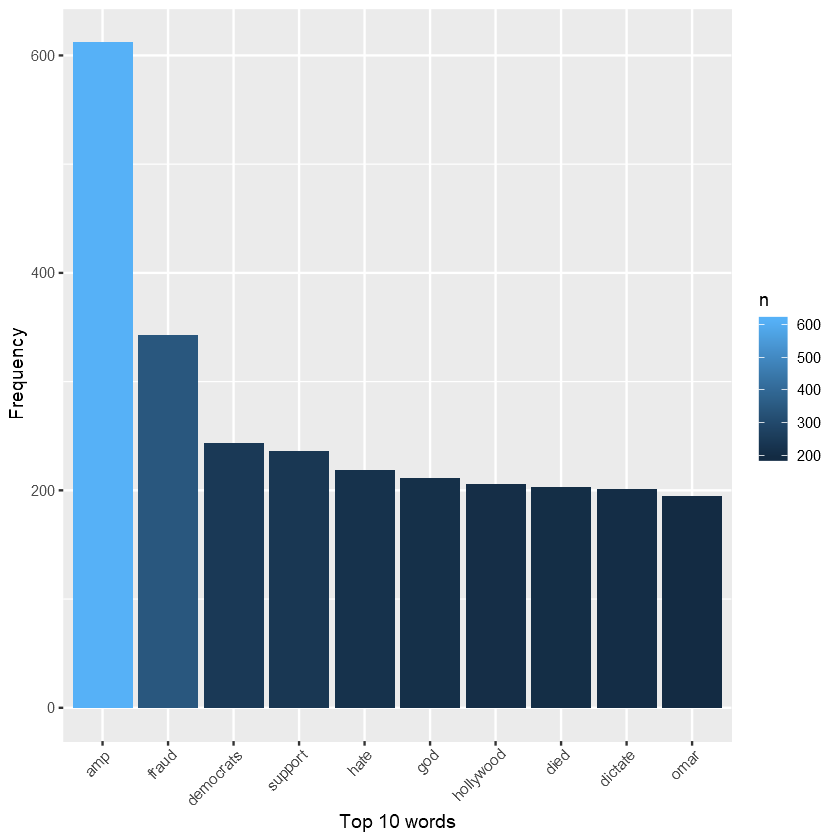

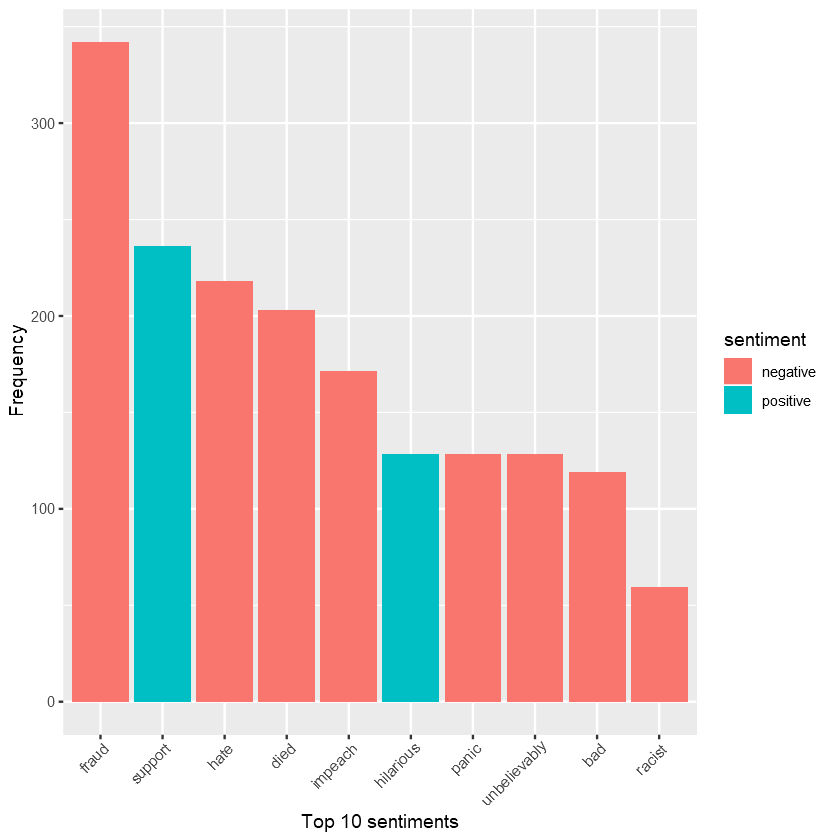

Joining, by = "word"


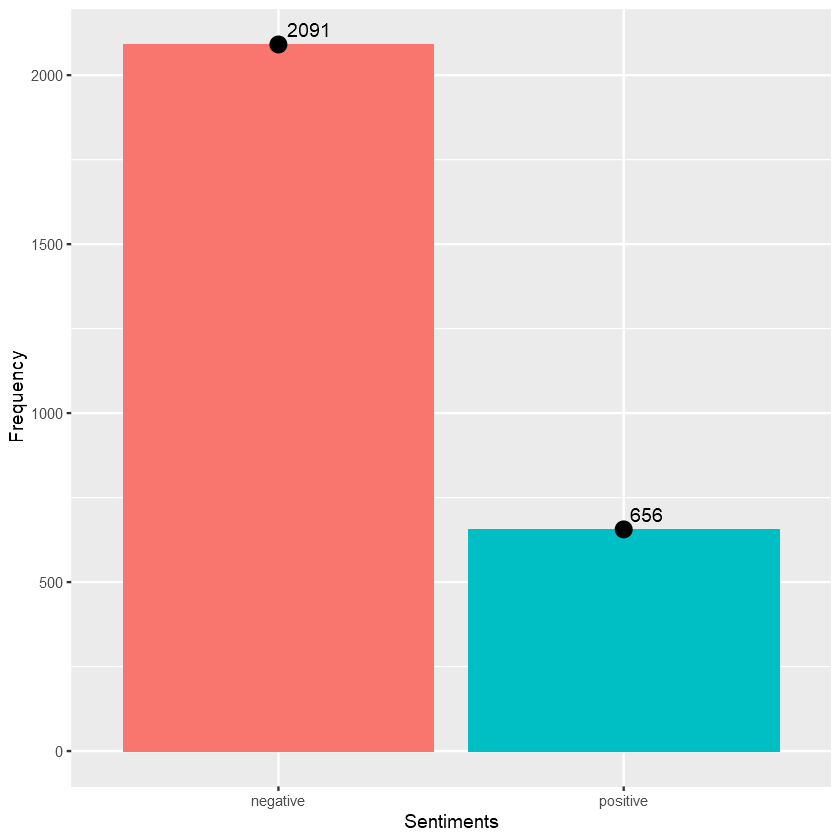

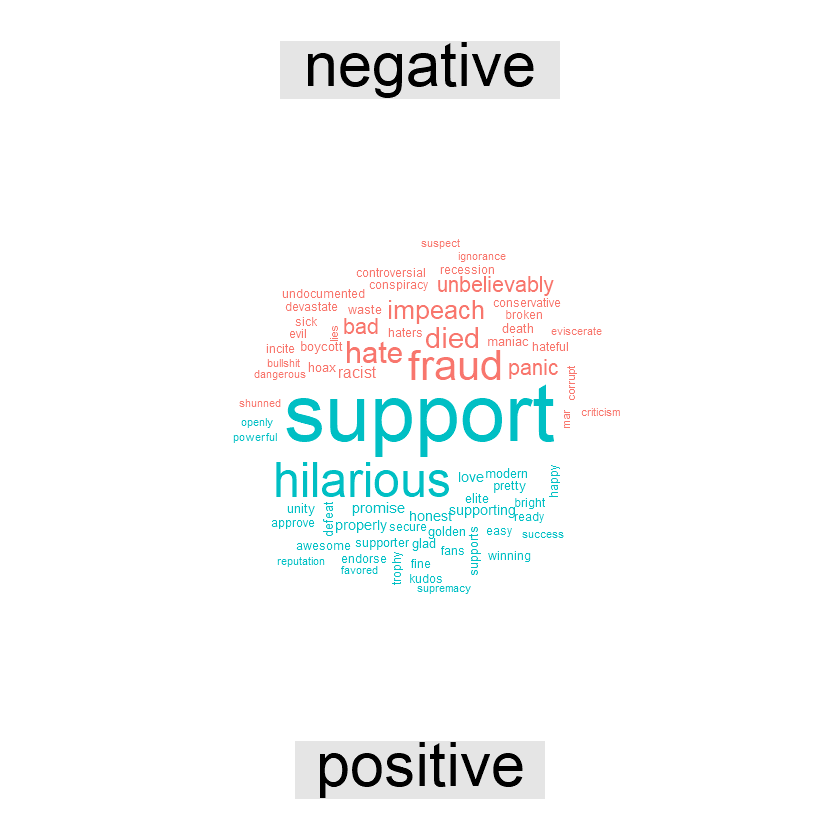

In [9]:
# Ploting the top 10 words
# For more information, see the help of these functions.
clean_tweet_words %>% 
  count(word, sort=T) %>% 
  slice(1:10) %>% 
  ggplot(aes(x = reorder(word, n, function(n) -n), y = n, fill = n)) + 
  geom_bar(stat = "identity") + 
  theme(axis.text.x = element_text(angle = 45, 
                                   hjust = 1)) +
  xlab("Top 10 words") +
  ylab("Frequency")


# Getting the words that match positive and negative sentiments
# For more information, see the help of these functions.
sentiments <- tidytext::get_sentiments("bing")

tweet_sentiment <- clean_tweet_words %>% 
  left_join(sentiments) %>% 
  filter(sentiment != "NA") # or drop_na()

table_resume <- tweet_sentiment %>% 
  group_by(sentiment) %>% 
  summarise(total = n()) %>% 
  mutate(percent = total/sum(total) )


# Other plots
# For more information, see the help of these functions.

tweet_sentiment %>% 
  count(word, sort=T) %>% 
  left_join(sentiments, by = c("word" = "word")) %>% 
  slice(1:10) %>% 
  ggplot(aes(x = reorder(word, n, function(n) -n), y = n, fill = sentiment)) + 
  geom_bar(stat = "identity") + 
  theme(axis.text.x = element_text(angle = 45, 
                                   hjust = 1)) +
  xlab("Top 10 sentiments") +
  ylab("Frequency")


ggplot(tweet_sentiment, aes(x=sentiment, y=)) +
  geom_bar(aes(fill = sentiment)) +
  guides(fill=FALSE) +
  #geom_line(data = table_resume, aes(x=sentiment, y=total, group=1), linetype="dashed", size=1.5) + 
  geom_point(data = table_resume, aes(x=sentiment, y=total, group=1), size=4, shape=19) +
  geom_text(data = table_resume, aes(x=sentiment, y=total, label=total),hjust=-0.2, vjust=-0.5) + 
  xlab("Sentiments") +
  ylab("Frequency")


#ggplot(data=table_resume, aes(x=sentiment, y=percent, group=1)) + 
#  geom_line(colour="red",linetype="dashed", size=1.5) + 
#  geom_point(colour="red", size=4, shape=19) + 
#  expand_limits(y=0) +
#  geom_text(aes(label = round(percent, digits = 2)), hjust=-0.2, vjust=-0.5) + 
#  xlab("Sentiments") +
#  ylab("Percentage of total")


clean_tweet_words %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  reshape2::acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  wordcloud::comparison.cloud(colors = c("#F8766D", "#00BFC4"), max.words = 70)




---